# Principle components analysis

In [1]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


## Small example
Suppose we have 9 points on the plane, defined by their $(x,y)$ coordinates

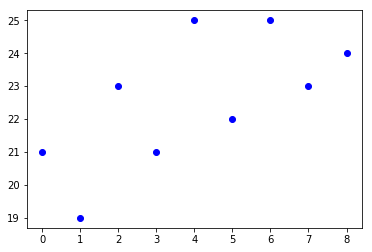

In [2]:
x = arange(0,9)
y = [21, 19, 23, 21, 25, 22, 25, 23, 24]
plot(x,y,'bo');

* These points are close to a straight line trending upwoards. We would like to find that line. 

* The line is described by a function of the form: $f_{w_0,w_1}(x) \doteq w_0+w_1 x$

* our goal is to find $w_0$ and $w_1$.

* In a previous notabooke we saw how to find a line that passes through 2 points.

* As here we have more than two points the system is **overconstrained** - there is no straight line that passes through all of the points.

* The points do not fall **exactly** on a line. So we are looking for $w_0,w_1$ 
such that the line is **closest** to the points.

We define the **Square difference** between the line $(w_0,w_1)$ and the points
$\langle (x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n) \rangle$ to be 
$$\sum_{i=1}^n [f_{w_0,w_1}(x_i)-y_i]^2$$
(In our example $n=9$)

The values of $w_0,w_1$ which minimize the square difference, are called the **least squares** solution.

We use `numpy.linalg` to find the minimum. 

To define the problem for `numpy.linalg` we use matrix notation. We define ${\bf A}$ to be the $n$ by $2$ matrix:
$${\bf A} =  \begin{pmatrix}
 1, x_1\\
 \vdots\\
 1, x_n
 \end{pmatrix} 
$$

 ${\bf y}$ and ${\bf w}$ to be column vectors:
 $${\bf y} =  \begin{pmatrix}
 y_1\\
 \vdots\\
 y_n
 \end{pmatrix} 
 ,\;\;\;\;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$$

We can then express the differences as a vector ${\bf d}$:
$$ {\bf d} = {\bf A} {\bf w} - {\bf y} $$

The square difference, that we wish to minimize, is $\|{\bf d}\|_2^2 = \sum_{i=1}^n d_i^2$

In [3]:
A = array([ ones(9),x ])
# linearly generated sequence
w = linalg.lstsq(A.T,y)[0] # obtaining the parameters

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
A = array(list(zip(x,y)))

def PCA(A):
    Mean= mean(A.T,axis=1) # Compute the location of the mean.
    M = (A-Mean).T # subtract the mean (along columns)
    [eigvals,eigvecs] = linalg.eig(cov(M))
    order=argsort(eigvals)[-1::-1] # ordering vectors so that eigen-values decreasing order
    print('order=',order)
    eigvals=eigvals[order]
    eigvecs=eigvecs[:,order]
    eigvecs=eigvecs.T
    return Mean,eigvals,eigvecs

Mean,eigvals,eigvecs = PCA(A)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)


order= [0 1]
Mean= [ 4.         22.55555556]
eigvals= [9.78318072 1.74459706]
eigvecs=
 [[ 0.84615144  0.53294253]
 [-0.53294253  0.84615144]]


In [5]:
def project(x,u):
    return Mean+(x-Mean).dot(u)*u
project(A[3],eigvecs[0,:])

def plot_PCA(x,y,Mean,eigvecs,eigvals,marker='o',markersize=5):
    plot(x,y,marker,markersize=markersize);
    plot(Mean[0],Mean[1],'kX',markersize=20);
    colors=['r','m']
    for i in range(2):
        principle=eigvecs[i,:]
        std=sqrt(eigvals[i])*2
        p1=Mean-principle*std
        p2=Mean+principle*std
        plot([p1[0],p2[0]],[p1[1],p2[1]],colors[i])

def plot_projections(A,eigvecs):
    for i in range(A.shape[0]):
        pt=A[i,:]
        proj=project(pt,eigvecs[0,:])
        plot([pt[0],proj[0]],[pt[1],proj[1]],'g')
def plot_regress_projections(x,y,w):
    line = w[0]+w[1]*x # regression line
    plot(x,line,'k-')

    for i in range(len(x)):
        plot([x[i],x[i]],[y[i],w[1]*x[i]+w[0]],'y')   



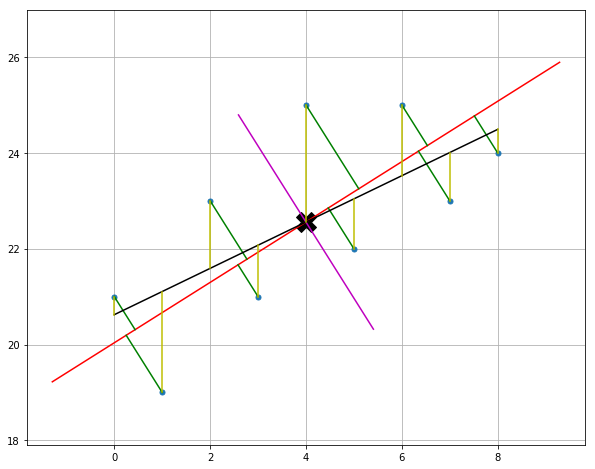

In [6]:
#plotting data and mean
figure(figsize=[10,8])
plot_PCA(x,y,Mean,eigvecs,eigvals)
plot_projections(A,eigvecs)
plot_regress_projections(x,y,w)
plt.axis('equal')
grid()

## A real-life example
We now turn our attention to the analysis of some real-word data. This data describes  the weight and height of some 25,000 people.

Weight/Weight data downloaded from [here](https://people.sc.fsu.edu/~jburkardt/data/csv/csv.html)

In [7]:
HW=pd.read_csv('data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()


,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [8]:
from math import sin,cos
def rotate(data,theta):
    Mean= mean(data.T,axis=1)
    M=np.array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    return (data-Mean).dot(M.T)+Mean


In [9]:
_array=rotate(np.array(HW),0)
Mean,eigvals,eigvecs = PCA(_array)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)

print(_array[0,:])

order= [1 0]
Mean= [ 67.9931136  127.07942116]
eigvals= [136.90940491   2.68350923]
eigvecs=
 [[-0.08336679 -0.99651893]
 [-0.99651893  0.08336679]]
[ 65.78331 112.9925 ]


In [10]:
eigvecs

array([[-0.08336679, -0.99651893],
       [-0.99651893,  0.08336679]])

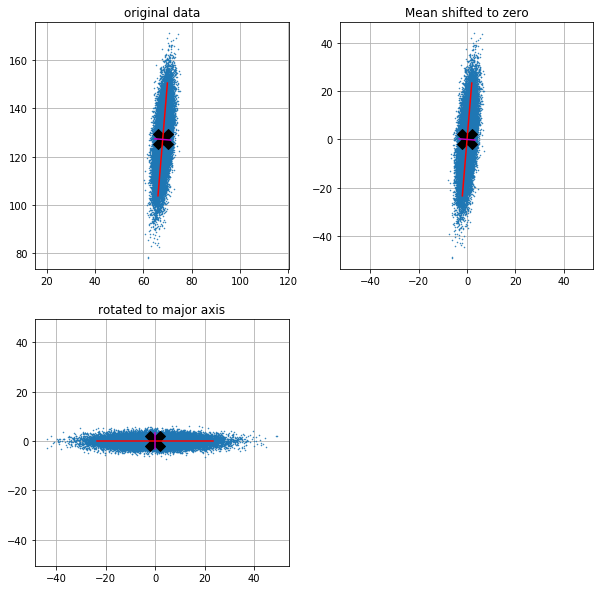

In [11]:
#plotting 
figure(figsize=[10,10])
subplot(221)
plot_PCA(_array[:,0],_array[:,1],Mean,eigvecs,eigvals,marker='.',markersize=1)
plt.axis('equal')
plt.title('original data')
grid()

_shifted = _array-Mean
subplot(222)
plot_PCA(_shifted[:,0],_shifted[:,1],np.array([0,0]),eigvecs,eigvals,marker='.',markersize=1)
plt.axis('equal')
plt.title('Mean shifted to zero')
grid()

_rotated=_shifted.dot(eigvecs.T)
subplot(223)
plot_PCA(_rotated[:,0],_rotated[:,1],np.array([0,0]),np.array([[1,0],[0,1]]),\
         eigvals,marker='.',markersize=1)
plt.axis('equal')
plt.title('rotated to major axis')
grid()




### PCA in 2D and computer vision.
Sometimes it makes sense to approximate small regions, or "blobs" using ellipses.

PCA provides  a simple and efficient way for doing that.


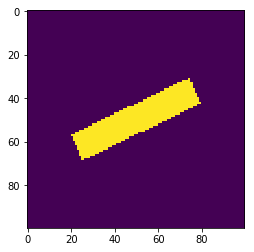

In [12]:
n=100
image=np.zeros([n,n])
theta=pi/7
scale_x=0.2
scale_y=1
Scale=np.array([[scale_x,0],[0,scale_y]])
M=np.array([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
P=M.dot(Scale)
for i in arange(-n/2,n/2,.5):
    for j in arange(-n/2,n/2,.5):
        if max(abs(i),abs(j))<30:
            v=np.array([i,j])
            s=P.dot(v)+np.array([n/2,n/2])
            x,y=[int(a) for a in s]
            image[x,y]=1
imshow(image)

In [13]:
nz=np.array(nonzero(image))
shape(nz)

(2, 780)

In [14]:
Mean,eigvals,eigvecs = PCA(nz.T)
print('Mean=',Mean)
print('eigvals=',eigvals)
print('eigvecs=\n',eigvecs)


order= [1 0]
Mean= [49.5 49.5]
eigvals= [301.53805674  14.04345802]
eigvecs=
 [[ 0.43719437 -0.89936704]
 [-0.89936704 -0.43719437]]


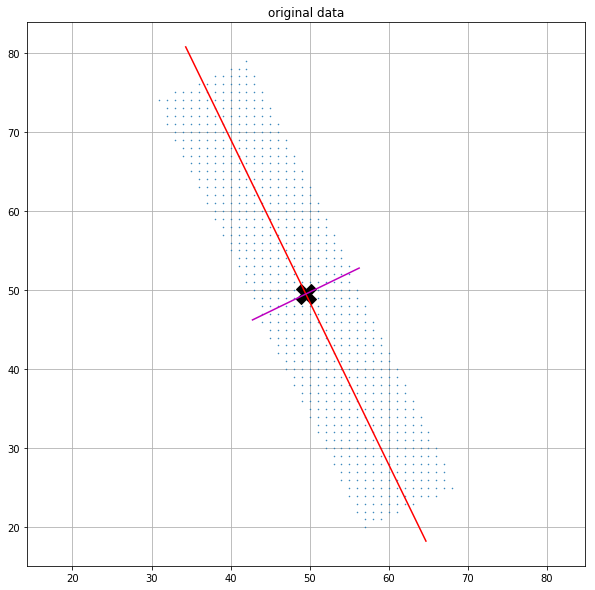

In [15]:
figure(figsize=[10,10])
plot_PCA(nz[0,:],nz[1,:],Mean,eigvecs,eigvals,marker='.',markersize=1)
plt.axis('equal')
plt.title('original data')
grid()
